# Lab B Value At Risk
By Anthony Sanford & Nicolas Harvie
***

## Outline 
1. VaR Basics 
2. Parametric Models 
3. Review of Quantile Regression 
4. Coverage and Independance
***

## VaR Basics

The concept of VaR basically concerns the estimation of risk based on the tail of the distribution. Usually, it is used to determine the maximum ($) loss on an asset or portfolio of assets.

In [24]:
# import packages 
import pandas as pd
import numpy as np
import statsmodels.api as sm

# import image module
from IPython.display import Image

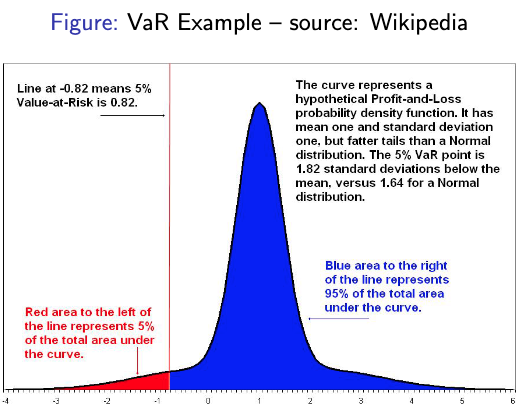

In [25]:
Image('../slide_images/VaR.png')

You can interpret VaR as "the minimum loss that occurs 5% of the time, over a given window".

You can interpret ES as the expected value of the loss, given that it's a bigger loss than the VaR threshold.

In [26]:
returns_data = pd.read_csv('../data/returns_for_VaR.csv',index_col=0,parse_dates=True)


In [27]:
returns_data

,VWRETD,TWTR,AMZN,TSLA
Date,,,,
2013-11-08,0.012360,-0.072383,0.019647,-0.013036
2013-11-11,0.001005,0.030012,0.011613,0.048916
2013-11-12,-0.002250,-0.023310,-0.013680,-0.047672
2013-11-13,0.008522,0.016706,0.019140,0.006531
2013-11-14,0.004572,0.049061,0.031374,-0.007931
...,...,...,...,...
2022-03-25,0.003084,-0.005667,0.006868,-0.003235
2022-03-28,0.006122,0.013472,0.025593,0.080345
2022-03-29,0.014708,0.040133,0.001920,0.007080


In [28]:
# Describe the Results
returns_data.describe()

,VWRETD,TWTR,AMZN,TSLA
count,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.000524,0.000499,0.001254,0.002327
std,0.010728,0.033447,0.019479,0.034678
min,-0.118168,-0.241625,-0.109972,-0.210628
25%,-0.003456,-0.014409,-0.007771,-0.014661
50%,0.000748,0.000580,0.001224,0.001216
75%,0.005400,0.015169,0.010841,0.018222
max,0.091556,0.214171,0.141311,0.198949


In [29]:
# VaR Calculation for some column
portfolio = np.array(returns_data['VWRETD'])

In [30]:
# VaR and ES of the Arrays
VaR = np.quantile(portfolio, 0.05)
ES = np.mean(portfolio[portfolio<VaR])

In [31]:
VaR

-0.0155546

In [32]:
ES

-0.026306952830188676

*** 
## Parametric Models

You can think about conditional VaR as value at risk given a quantile for some variable, conditioned on some other variable. 

This is the reason why we use the error term of the regression to determine the conditional VaR.

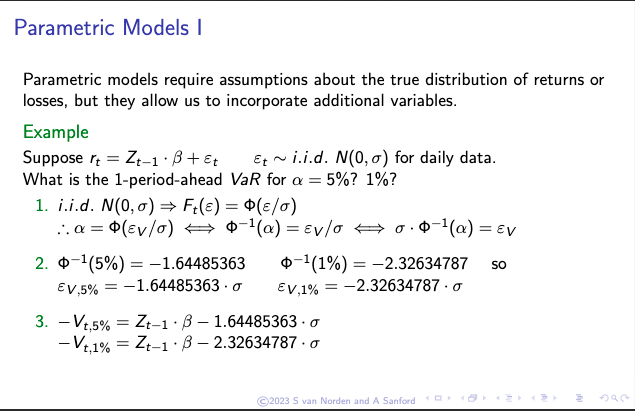

In [33]:
Image('../slide_images/ParametricModels.png')

In [34]:
# The Regression model
mcoTWTR = sm.OLS(returns_data['TWTR'], sm.add_constant(returns_data['VWRETD'])).fit()

In [35]:
mcoTWTR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TWTR   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     438.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.48e-88
Time:                        11:07:56   Log-Likelihood:                 4381.1
No. Observations:                2113   AIC:                            -8758.
Df Residuals:                    2111   BIC:                            -8747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.270      0.788      -0.001       0.001
VWRETD         1.2925      0.062     20.932      0.000       1.171       1.414
==============================================================================
Omnibus:                      506.972   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14102.237
Skew:                          -0.492   Prob(JB):                         0.00
Kurtosis:                      15.618   Cond. No.                         93.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What you will basically have to do is:
1. Find the scale parameter from the regression model (sigma hat)
2. Find the mean of the process
3. Use a function that will find the PPF (!!) of the distribution at the desired quantile 
4. This will give you the VaR 

It will be the same concept for the next question, but with a more complex model

In [36]:
# A quick tip
dir(mcoTWTR)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

*** 
## Quantile Regression Review

[Quantile Regression](https://data.library.virginia.edu/getting-started-with-quantile-regression/)

***
## Coverage

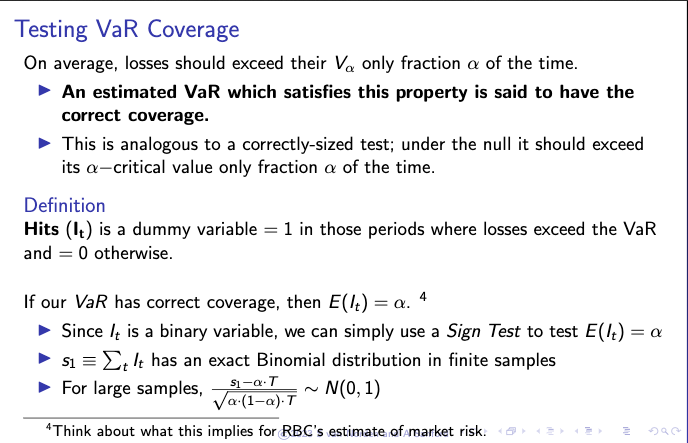

In [37]:
Image('../slide_images/VaR_Cov.png')

In [38]:
# Get an array of indicator variables given the VaR
hits = portfolio < VaR

In [39]:
# Our distribution
np.unique(hits, return_counts=True)

(array([False,  True]), array([2007,  106]))

In [40]:
# To get full array size 
len(hits)

2113

I will let you find the exact test methodology (it's pretty much written in the homework anyway), but you should have a pretty good idea anyway!

***
## Independence

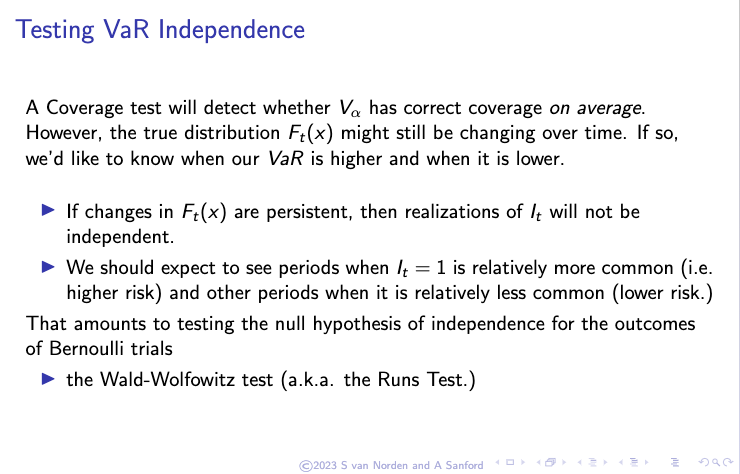

In [41]:
Image('../slide_images/VaR_Independance.png')

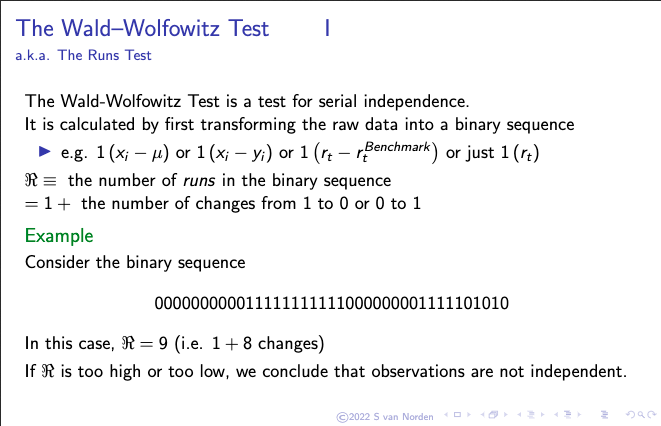

In [42]:
Image('../slide_images/Runs1.png')

Voir Example 15-14 dans le Chapitre de Mann